## ARIMA Model for Time Series Forecasting in Python

#### < Overview >

A popular and widely used statistical method for time series forecasting is the ARIMA model.

ARIMA stands for AutoRegressive Integrated Moving Average and represents a cornerstone in time series forecasting. \
It is a statistical method that has gained immense popularity due to its efficacy in handling various standard temporal structures present in time series data.

#### < Objectives >

We want to study and create codes for:

- About the ARIMA model the parameters used and assumptions made by the model.
- How to fit an ARIMA model to data and use it to make forecasts.
- How to configure the ARIMA model on your time series problem.

#### < What is ARIMA >

ARIMA : Autoregressive Integrated Moving Average Model

ARIMA model stands as a statistical powerhouse for analyzing and forecasting time series data. \
It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

#### < Decode ARIMA >

Let’s decode the essence of ARIMA:

- AR (Autoregression): This emphasizes the dependent relationship between an observation and its preceding or ‘lagged’ observations.
- I (Integrated): To achieve a stationary time series, one that doesn’t exhibit trend or seasonality, differencing is applied. It typically involves subtracting an observation from its preceding observation.
- MA (Moving Average): This component zeroes in on the relationship between an observation and the residual error from a moving average model based on lagged observations.

#### < ARIMA parameters >

The parameters of the ARIMA model are defined as follows:

- p: The lag order, representing the number of lag observations incorporated in the model.
- d: Degree of differencing, denoting the number of times raw observations undergo differencing.
- q: Order of moving average, indicating the size of the moving average window.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

Interestingly, any of these parameters can be set to 0. Such configurations enable the ARIMA model to mimic the functions of simpler models like ARMA, AR, I, or MA.

#### Shampoo datasets

The Shampoo Sales dataset provides a snapshot of monthly shampoo sales spanning three years, resulting in 36 observations. Each observation is a sales count. The genesis of this dataset is attributed to Makridakis, Wheelwright, and Hyndman (1998).

Below is an example of loading the Shampoo Sales dataset with Pandas with a custom function to parse the date-time field. The dataset is baselined in an arbitrary year, in this case 2000.

In [10]:
# import library
import pandas as pd
from pandas import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

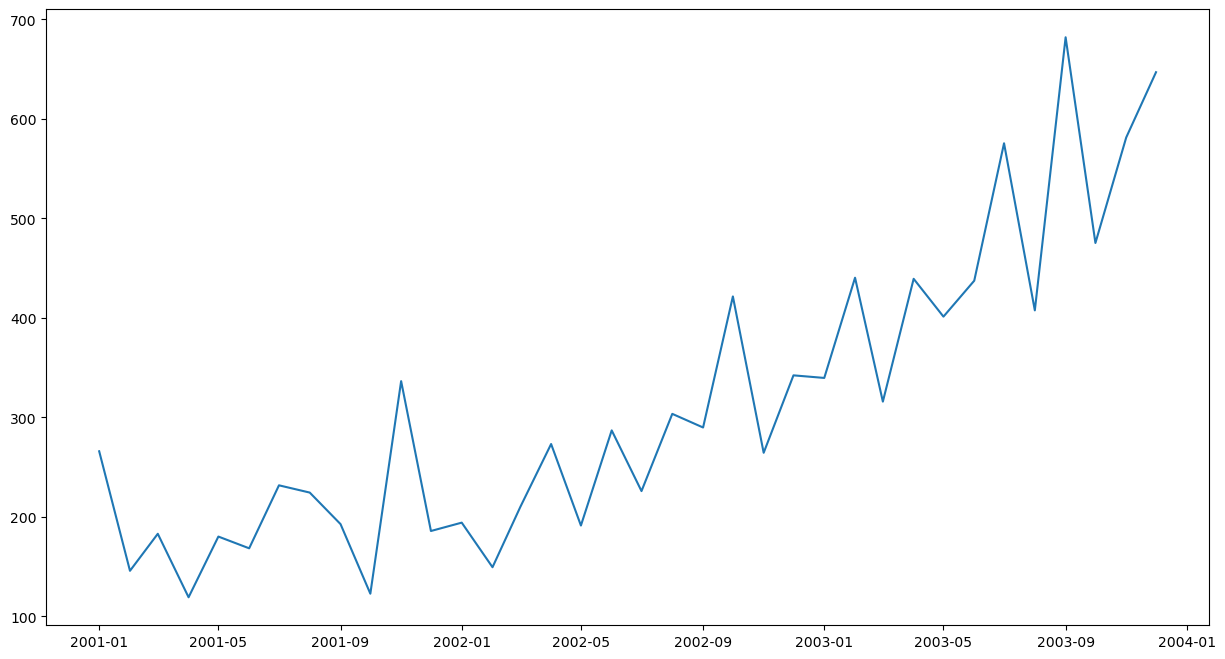

In [12]:
# import shampoo datasets

def parser(x):
    return datetime.strptime('200'+x, '%Y-%m')

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url,header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# plot the shampoo dataset grapgh
plt.figure(figsize = (15,8))
plt.plot(df)

#### Observations


We can see that the Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary 
and will require differencing to make it stationary, at least a difference order of 1.

Pandas offers a built-in capability to plot autocorrelations. The following example showcases the autocorrelation for an extensive set of time series lags:

Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

This provides a hint: initiating the AR parameter of our model with a value of 5 could be a beneficial starting point.

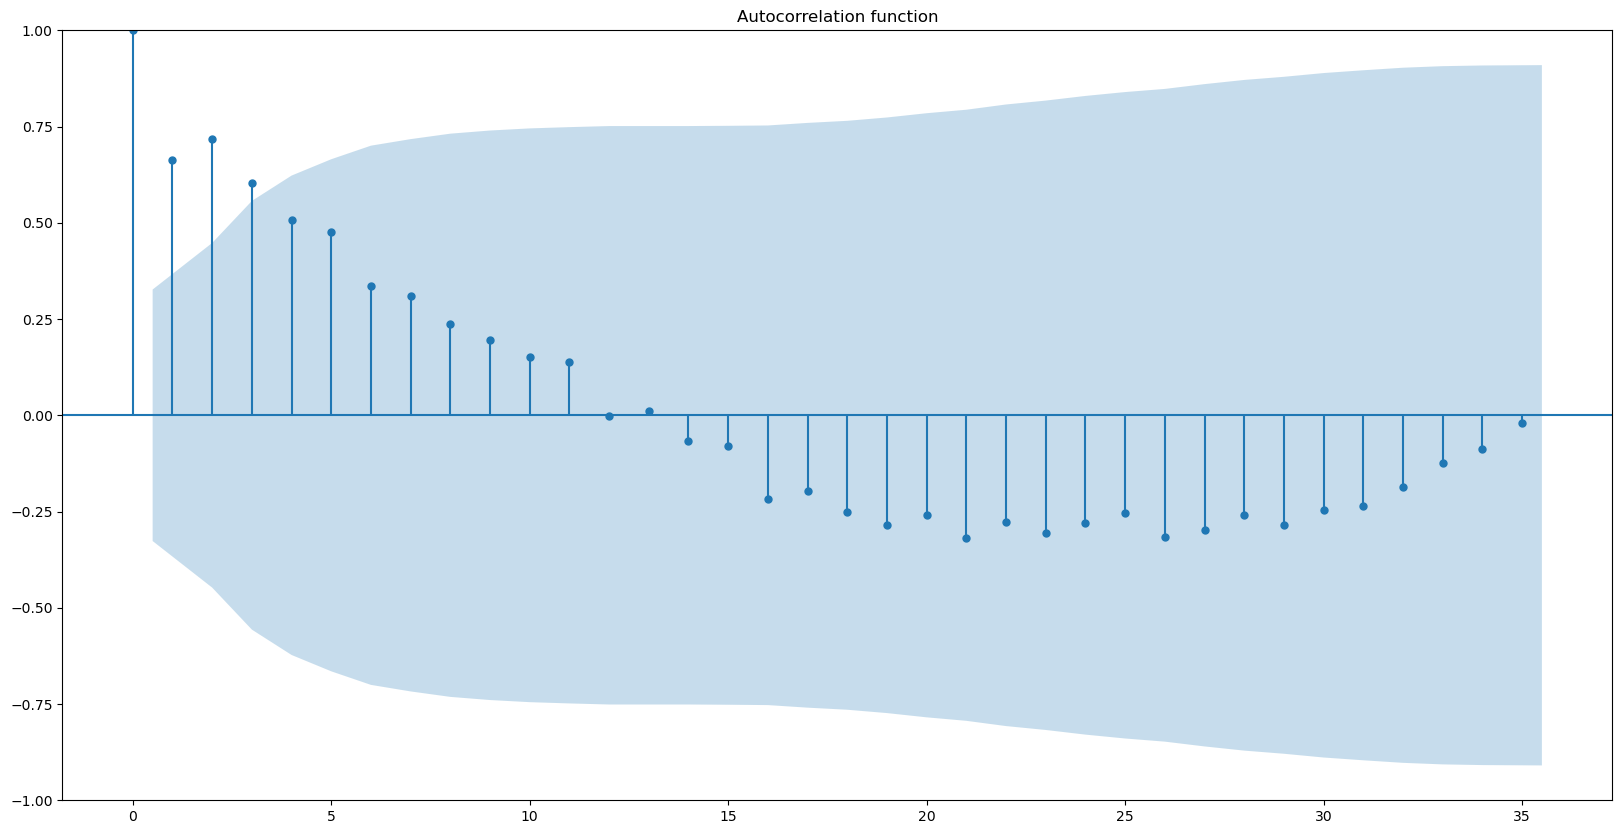

In [16]:
# statsmodels Time series Analysis plot: Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,10))
plot_acf(df, lags = 35, title='Autocorrelation function')
plt.show()

#data: your time series
#lags: number of 'periods' you will like to investigate 

#### ARIMA with python

The statsmodels library stands as a vital tool for those looking to harness the power of ARIMA for time series forecasting in Python.

Building an ARIMA Model: A Step-by-Step Guide:

(1) Model Definition: Initialize the ARIMA model by invoking ARIMA() and specifying the p, d, and q parameters. \
(2) Model Training: Train the model on your dataset using the fit() method. \
(3) Making Predictions: Generate forecasts by utilizing the predict() function and designating the desired time index or indices.

#### Step-by-step ARIMA

Let’s start with something simple.  \
 We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

We’ll employ the ARIMA(5,1,0) configuration:
 - 5 lags for autoregression (AR)
- 1st order differencing (I)
- No moving average term (MA)



                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 18 Mar 2024   AIC                            408.969
Time:                        01:03:58   BIC                            418.301
Sample:                    01-01-2001   HQIC                           412.191
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

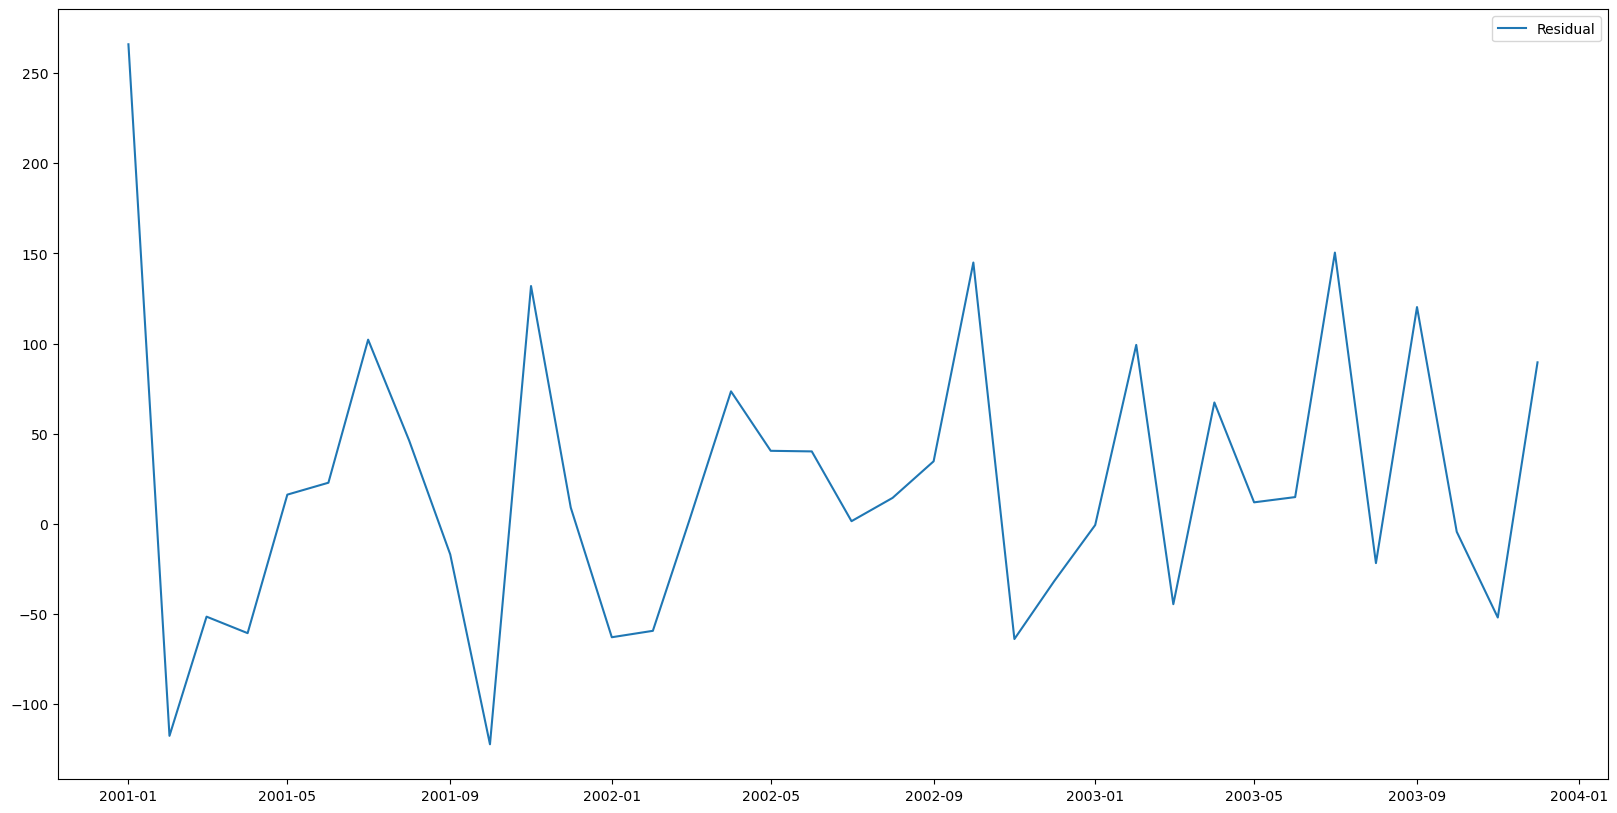

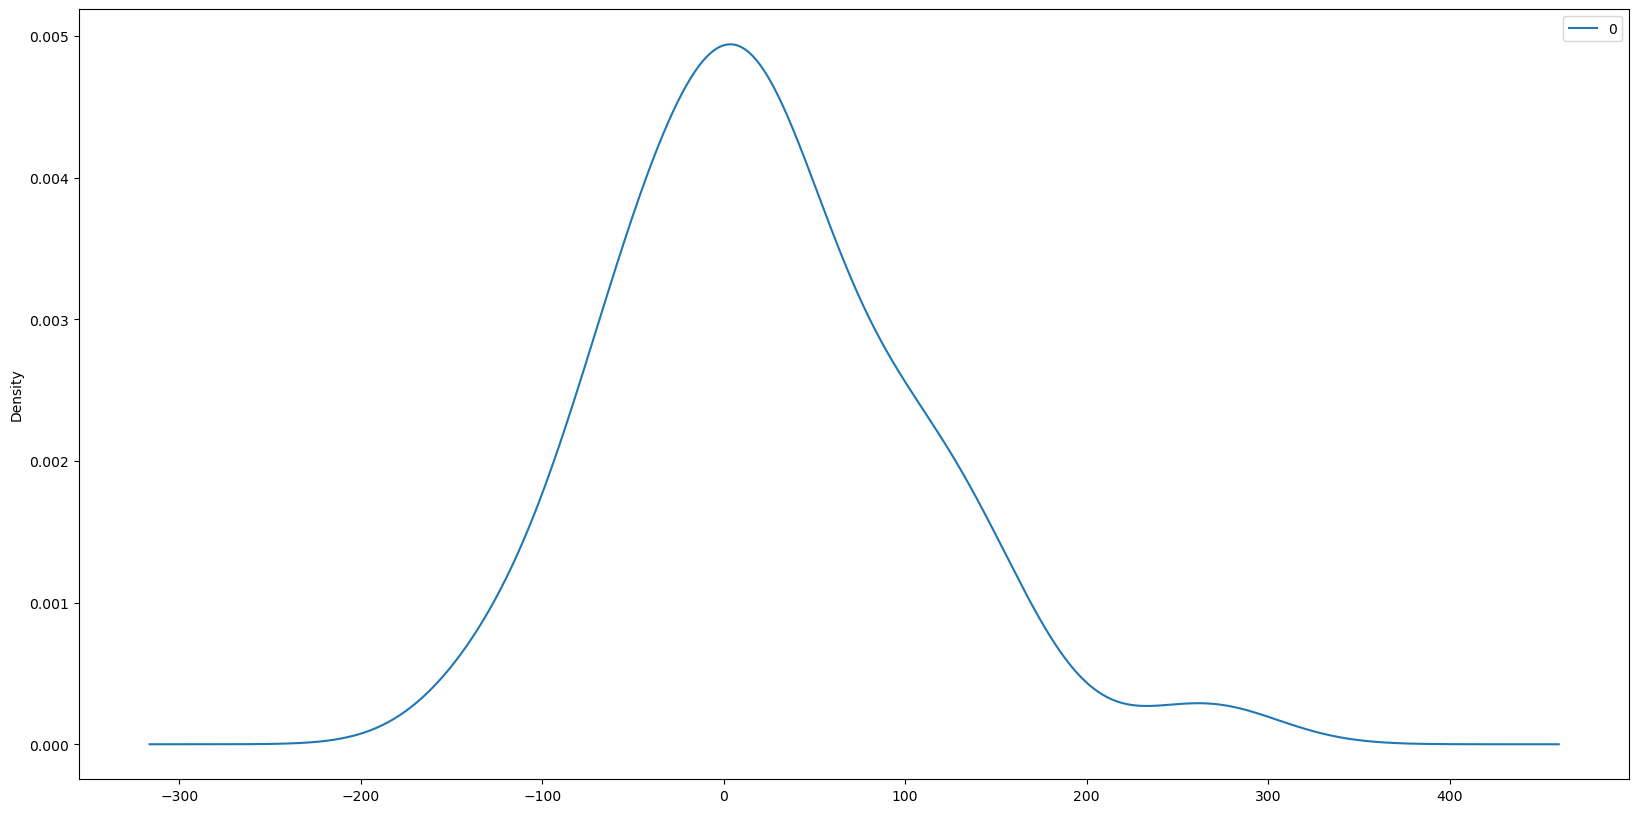

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [47]:
# ARIMA using statsmodel

# fit model
series = df

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals, label = 'Residual')
plt.legend()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

#### Observations

- Running the example prints a summary of the fit model. This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

- First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

- Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centred on zero.